In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.insert(0, "../build")
import _gols as gols
numpy.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


We're going to try to approximate a 1D function using a superposition of Gaussians.
Let's pick something that looks like the Buckingham potential:

In [2]:
N = 128
x = numpy.linspace(1,10,N)
bucky = numpy.exp(-x/3) - x**-6

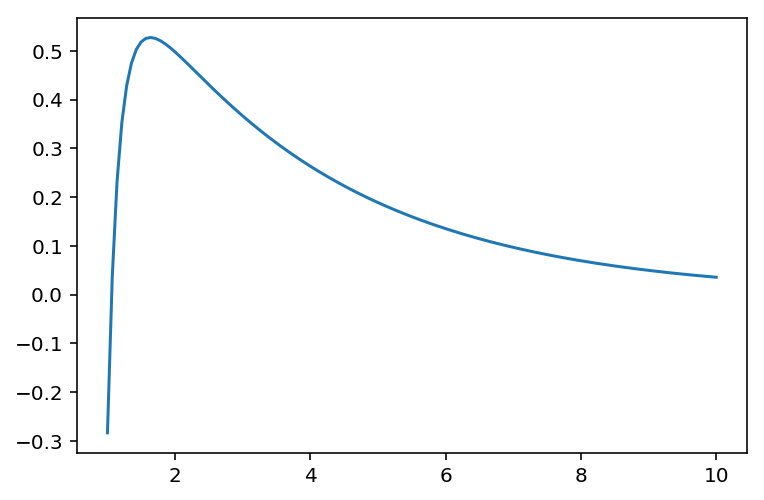

In [3]:
plot(x,bucky)

Now we're going to generate a dictionary of Gaussians of different sizes

In [4]:
M = 512
sigmas = 10**(numpy.random.random(M)*2-1)
gaussians = numpy.array([numpy.exp(-x**2/(2*sigma**2)) for sigma in sigmas])

Let's normalize the atoms

In [5]:
gaussians = numpy.divide(gaussians, numpy.linalg.norm(gaussians, axis=1)[:,None])

In [6]:
sparsity = range(2,160,2)
max_error1 = []
for k in sparsity:
    columns, _ = gols.gols_solve(gaussians, bucky, k, 1, False)
    best_gaussians = numpy.array([gaussians[c] for c in columns]).T
    coeff, _, _, _ = numpy.linalg.lstsq(best_gaussians, bucky)
    max_error1.append(abs(best_gaussians.dot(coeff)-bucky).max())

max_error2 = []
for k in sparsity:
    columns, _ = gols.gols_solve(gaussians, bucky, k, 2, False)
    best_gaussians = numpy.array([gaussians[c] for c in columns]).T
    coeff, _, _, _ = numpy.linalg.lstsq(best_gaussians, bucky)
    max_error2.append(abs(best_gaussians.dot(coeff)-bucky).max())

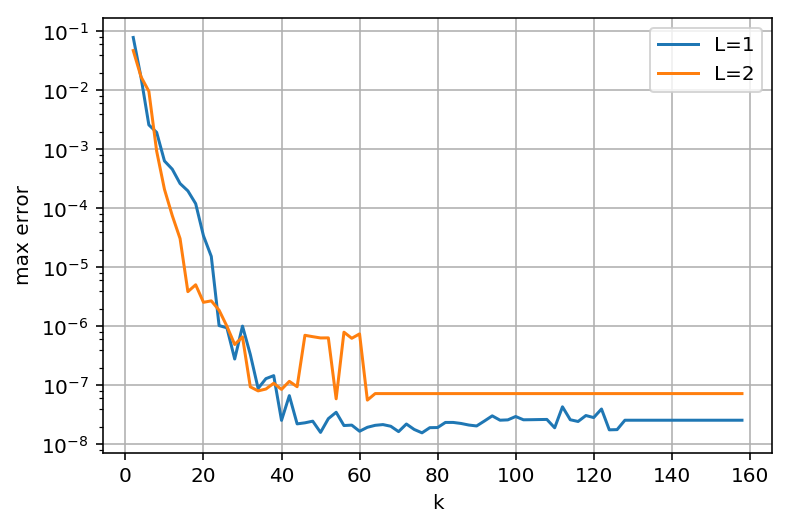

In [7]:
semilogy(sparsity, max_error1, label='L=1')
semilogy(sparsity, max_error2, label='L=2')
ylabel('max error')
xlabel('k')
legend()
grid()